In [6]:
import nb_utils
proj_dir = nb_utils.proj_path_setup()

In [7]:
from data_wrangling.make_dataset import download_competition_data
download_competition_data()

In [9]:
#standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('ggplot')

%matplotlib inline

In [15]:
train_df = pd.read_csv(os.path.join(proj_dir, 'data', 'raw', 'train.csv'))
test_df = pd.read_csv(os.path.join(proj_dir, 'data', 'raw', 'test.csv'))

In [14]:
train_df

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


In [16]:
test_df

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36
...,...,...,...,...,...,...,...
271,685,1.029,6.27,853,21.4,364,7.31
272,686,1.012,5.62,410,14.0,195,1.45
273,687,1.031,5.68,874,29.0,380,4.49
274,688,1.019,5.47,543,21.4,170,1.64


In [18]:
feature_cols = [col for col in test_df.columns if col != 'id']
feature_cols

['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']

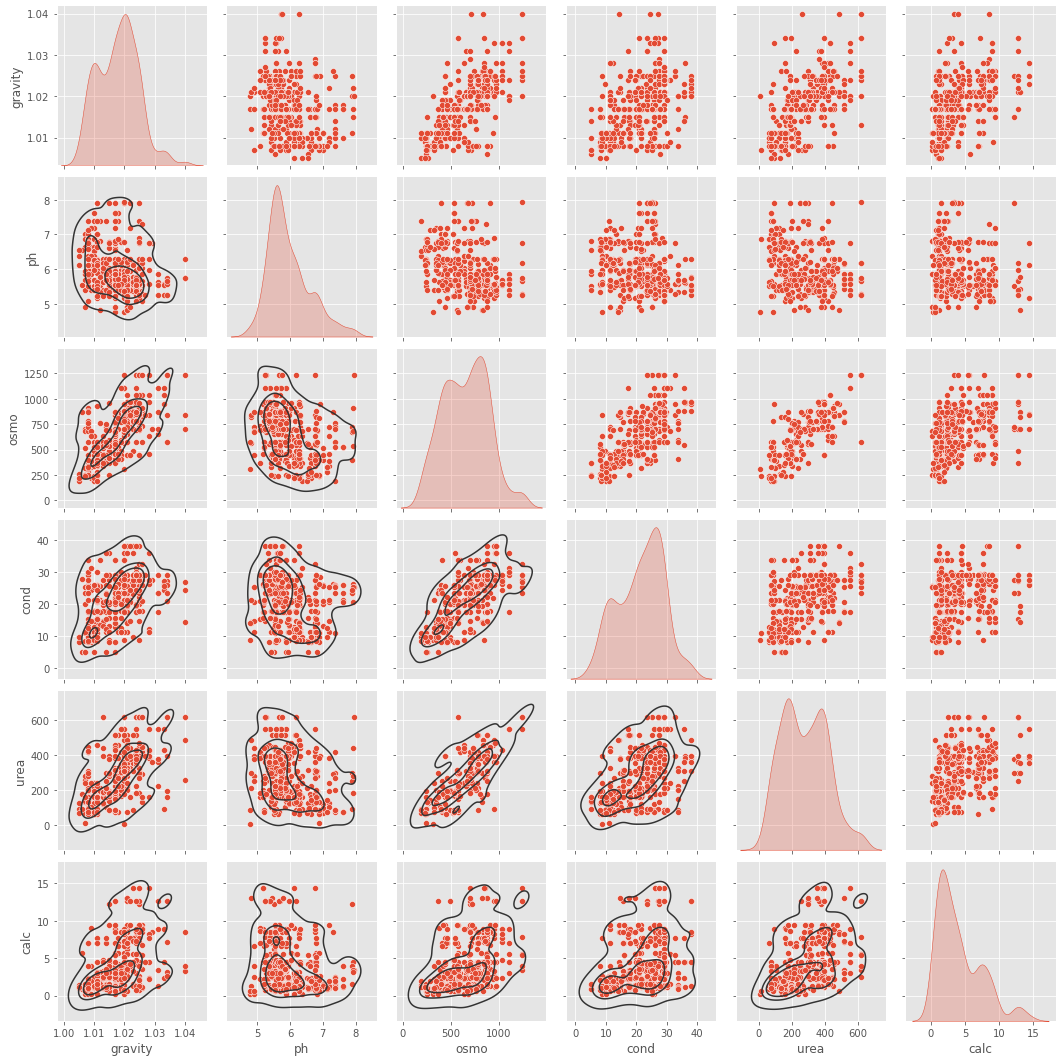

In [24]:
g = sns.pairplot(train_df[feature_cols], diag_kind='kde')
g.map_lower(sns.kdeplot, levels=4, color=".2")

From the above it looks like there are some obvious correlations between osmo, urea, gravity and cond as well as gravity and everything but pH.  These are to be expected in osmo=osmolarity and gravity=specific gravity.

Don't know that I would gain anything more from exploring this data more deeply.

I think the next step is to scale the data and then perhaps try out some simple models to see how well they perform on the test set (or a validation set if that makes more sense).